# Projet : Vente dans une librairie

## 1.Importation des packadges

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from tabulate import tabulate

In [2]:
#Importation des données
df_customers = pd.read_csv("customers.csv")
df_products = pd.read_csv("products.csv")
df_transactions = pd.read_csv("transactions.csv")

### 1.1 Aperçu sur les dataframes

In [3]:
#Créer une fonction pour vérifier l'unicité de la clé primaire
def primary_key(data,key):
    nbre_ligne = len(data)
    unique_id = len(data.groupby(key).size())
    if nbre_ligne == unique_id:
        print(f"{key} est une clé primaire")
    else:
        print(f"{key} n'est pas une clé primaire")     

**df_customers**

In [4]:
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [5]:
#Vérifier l'unicité de la clé primaire de la table client
primary_key(df_customers,"client_id")

client_id est une clé primaire


In [6]:
#Informations sur la table client
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [7]:
#Les modalités de la variable sex
df_customers["sex"].value_counts()

f    4491
m    4132
Name: sex, dtype: int64

In [8]:
#Vérifier s'il y a des valeurs manquantes
df_customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [9]:
#Vérifier s'il y a des doublons
df_customers.duplicated().sum()

0

**df_products**

In [10]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [11]:
#Vérifier l'unicité de la clé primaire de la table producteur
primary_key(df_products,"id_prod")

id_prod est une clé primaire


In [12]:
#Informations sur la table producteur
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [13]:
#Les modalités de la variables categ
df_products["categ"].value_counts()

0    2309
1     739
2     239
Name: categ, dtype: int64

In [14]:
#Vérifier s'il y a des valeurs manquantes
df_products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [15]:
#Vérifier s'il y a des doublons
df_products.duplicated().sum()

0

**df_transactions**

In [16]:
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [17]:
#Vérification l'unicité de la clé primaire dans cette table 
primary_key(df_transactions,"id_prod")
primary_key(df_transactions,"client_id")
primary_key(df_transactions,"session_id")
primary_key(df_transactions,["id_prod","date"])
primary_key(df_transactions,["client_id","date"])

id_prod n'est pas une clé primaire
client_id n'est pas une clé primaire
session_id n'est pas une clé primaire
['id_prod', 'date'] n'est pas une clé primaire
['client_id', 'date'] n'est pas une clé primaire


In [18]:
#Informations sur la table transactions
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [19]:
#Vérifier s'il des valeurs manquantes
df_transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [20]:
#Vérifier s'il y a des doublons
df_transactions.duplicated().sum()

126

### 1.2 Nettoyage des tables

**df_products**

In [21]:
df_products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [22]:
#Modifier le type de la variable categ en "object"
df_products["categ"] = df_products["categ"].astype("object")
#Identifier les produits avec des prix négatifs
df_products[df_products["price"]<0]

,id_prod,price,categ
731,T_0,-1.0,0


In [23]:
moyenne_categ0 = round(df_products.loc[df_products["categ"]==0,"price"].mean(),0)
moyenne_categ0

12.0

In [24]:
#Imputer la moyenne du prix des produits de catégorie 0 au produit avec un prix négatif
df_products.loc[df_products["price"]<0,"price"] = moyenne_categ0
#Informations sur la table après ces changements
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   object 
dtypes: float64(1), object(2)
memory usage: 77.2+ KB


**df_transactions**

In [25]:
df_transactions.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [26]:
#Identifier les lignes avec les dates qui commencent par test
df_transactions[df_transactions["date"].str.startswith("test")]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [27]:
#Dataframe sans les données tests
df_transactions = df_transactions[~df_transactions["date"].str.startswith("test")]
#Modifier le type de la variable date en "datetime"
df_transactions["date"] = pd.to_datetime(df_transactions["date"])
#Informations sur la table
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


### 1.3 Fusion des dataframe

In [28]:
#Première fusion entre la table transactions et la table productions  
fusion = pd.merge(df_transactions,df_products,on="id_prod",how="left")
fusion

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0
...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0


In [29]:
#Deuxième fusion entre la première et la table consommateurs
data = pd.merge(fusion,df_customers,on="client_id",how="left")
data

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0,m,1980
...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0,f,1951
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1,f,1977
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0,f,1988
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0,m,1986


In [30]:
#Informations sur table finale après fusion 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  object        
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 46.6+ MB


In [31]:
#Vérifier les valeus manquantes
data.isnull().sum()

id_prod         0
date            0
session_id      0
client_id       0
price         221
categ         221
sex             0
birth           0
dtype: int64

In [32]:
#Identifier les valeurs manquantes
data[data["price"].isnull()]

,id_prod,date,session_id,client_id,price,categ,sex,birth
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,m,1940
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,f,1963
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,m,1978
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,m,1991
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,m,1973
...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN,m,1981
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN,f,1979
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN,m,1981
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN,m,1986


In [33]:
#Suppression des valeurs manquantes
data = data.dropna()
#Vérification à nouveau des valeurs manquantes
data.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
dtype: int64

In [34]:
#Vérification des doublons
data.duplicated().sum()

0

In [35]:
#Informations sur le dataframe final
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679331
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679111 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  object        
 6   sex         679111 non-null  object        
 7   birth       679111 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 46.6+ MB


In [36]:
#Force du dataframe final
data.shape

(679111, 8)

In [37]:
#Copie du dataframe pour y apporter des modifications
df = data.copy()
#Mettre la variable date en index
df = df.set_index("date")
df

,id_prod,session_id,client_id,price,categ,sex,birth
date,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,4.18,0,f,1986
2022-02-02 07:55:19.149409,1_251,s_158752,c_8534,15.99,1,m,1988
2022-06-18 15:44:33.155329,0_1277,s_225667,c_6714,7.99,0,f,1968
2021-06-24 04:19:29.835891,2_209,s_52962,c_6941,69.99,2,m,2000
2023-01-11 08:22:08.194479,0_1509,s_325227,c_4232,4.99,0,m,1980
...,...,...,...,...,...,...,...
2022-01-15 13:05:06.246925,0_1551,s_150195,c_8489,12.99,0,f,1951
2022-03-19 16:03:23.429229,1_639,s_181434,c_4370,10.99,1,f,1977
2022-12-20 04:33:37.584749,0_1425,s_314704,c_304,12.99,0,f,1988


In [38]:
#Créer une colonne année
df["année"] = df.index.year
#Créer une colonne mois
df["mois"] = df.index.to_period("M")
#Créer une colonne semestre
df["semestre"] = df.index.to_period("Q")
#Créer une colonne jour
df["jour"] = df.index.to_period("D")
#Créer une colonne avec les noms des jours de la semaine
df["jr_semaine"] = df.index.day_name()
#Créer une colonne avec l'age des clients
df["age"] = df["année"] - df["birth"]
#Créer une colonne classe d'age
lab = ["moins de 30ans","entre 30 et 50 ans","plus de 50 ans"]
df["classe d'age"] = pd.cut(df["age"],bins=[16,30,50,94],labels=lab)

In [39]:
#Définir une fonction pour différencier les jours ouvrables et les weekend
def dayname(jour):
    if jour== "Saturday" or jour=="Sunday":
        return "weekend"
    else:
        return "jr_ouvrable"

In [40]:
#Appliquer la fonction sur la colonne jour de la semaine
df["weekend"] = df["jr_semaine"].apply(dayname)
df.head()

,id_prod,session_id,client_id,price,categ,sex,birth,année,mois,semestre,jour,jr_semaine,age,classe d'age,weekend
date,,,,,,,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,4.18,0,f,1986,2022,2022-05,2022Q2,2022-05-20,Friday,36,entre 30 et 50 ans,jr_ouvrable
2022-02-02 07:55:19.149409,1_251,s_158752,c_8534,15.99,1,m,1988,2022,2022-02,2022Q1,2022-02-02,Wednesday,34,entre 30 et 50 ans,jr_ouvrable
2022-06-18 15:44:33.155329,0_1277,s_225667,c_6714,7.99,0,f,1968,2022,2022-06,2022Q2,2022-06-18,Saturday,54,plus de 50 ans,weekend
2021-06-24 04:19:29.835891,2_209,s_52962,c_6941,69.99,2,m,2000,2021,2021-06,2021Q2,2021-06-24,Thursday,21,moins de 30ans,jr_ouvrable
2023-01-11 08:22:08.194479,0_1509,s_325227,c_4232,4.99,0,m,1980,2023,2023-01,2023Q1,2023-01-11,Wednesday,43,entre 30 et 50 ans,jr_ouvrable


## 2. Analyse globale

### 2.1 Variables quantitatives

In [41]:
#Isoler les deux variables quantitatives
liste = ["price","age"]

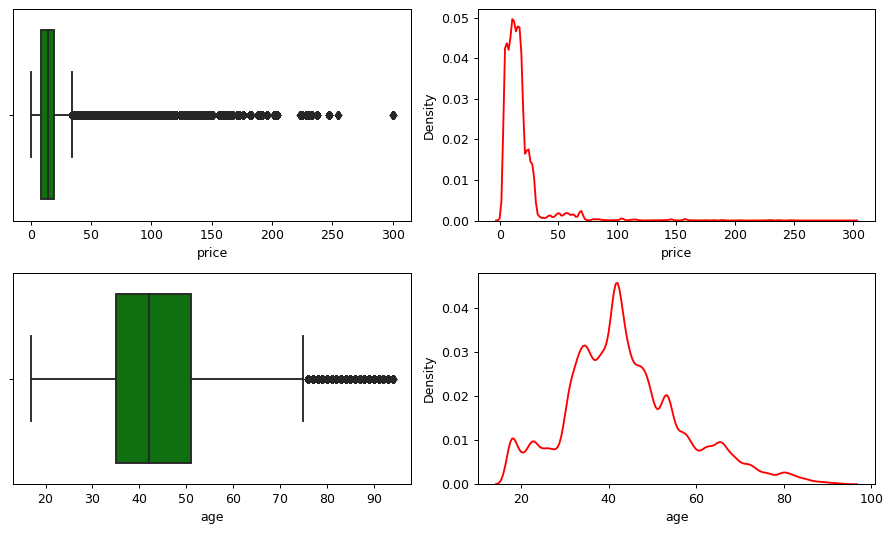

In [42]:
#2tude de la distribution sur ces deux variables quantitatives
fig,ax = plt.subplots(2,2,figsize=(10,6),dpi=90)
for i,col in enumerate(liste):
    sns.boxplot(data=df,x=df[col],ax=ax[i][0],color="green")
    sns.kdeplot(data=df,x=df[col],ax=ax[i][1],color="red")
fig.tight_layout(pad=1)    
plt.show()

In [43]:
#Quelques paramètres statistiques
summary = df[liste].describe().T
summary["IQR"] = summary["75%"] - summary["25%"]
summary["lower"] = summary["25%"] - 1.5*summary["IQR"]
summary["hupper"] = summary["75%"] + 1.5*summary["IQR"]
summary["etendue"] = summary["max"] - summary["min"]
summary["skewness"] = df[liste].skew()
summary["kutosis"] = df[liste].kurtosis()
summary["CV"] = summary["std"]*100/summary["mean"]

In [44]:
from tabulate import tabulate

In [45]:
print(tabulate(summary.T,headers=["Prix","Age"],tablefmt="fancy_grid",numalign="center"))

╒══════════╤═════════╤══════════╕
│          │  Prix   │   Age    │
╞══════════╪═════════╪══════════╡
│ count    │ 679111  │  679111  │
├──────────┼─────────┼──────────┤
│ mean     │ 17.4548 │ 43.8594  │
├──────────┼─────────┼──────────┤
│ std      │ 18.329  │  13.591  │
├──────────┼─────────┼──────────┤
│ min      │  0.62   │    17    │
├──────────┼─────────┼──────────┤
│ 25%      │  8.87   │    35    │
├──────────┼─────────┼──────────┤
│ 50%      │  13.99  │    42    │
├──────────┼─────────┼──────────┤
│ 75%      │  18.99  │    51    │
├──────────┼─────────┼──────────┤
│ max      │   300   │    94    │
├──────────┼─────────┼──────────┤
│ IQR      │  10.12  │    16    │
├──────────┼─────────┼──────────┤
│ lower    │  -6.31  │    11    │
├──────────┼─────────┼──────────┤
│ hupper   │  34.17  │    75    │
├──────────┼─────────┼──────────┤
│ etendue  │ 299.38  │    77    │
├──────────┼─────────┼──────────┤
│ skewness │ 5.39036 │ 0.568646 │
├──────────┼─────────┼──────────┤
│ kutosis  │ 4

**Interprétations**

 * les prix varient entre 0.62€ et 300€
 * 50% des livres ont un prix compris entre 8.87€ et 18.99€
 * 50% des livres ont un prix inférieur à 13.99€
 * le prix moyen est de 17.45€
 * le coefficient d'asymétrie montre un décalage des données vers la droite
 * le coefficient de kurtosis indique une distribution qui n'est pas aplatie
 
 
 * l'âge des clients varie entre 17ans et 94ans
 * 50% des clients ont un âge compris entre 35ans et 51ans
 * 50% des clients ont un âge inférieur à 42ans
 * l'âge moyen est de 44ans
 * le coefficient d'asymétrie montre un décalage des données vers la droite
 * le coefficient de kurtosis indique une distribution qui n'est pas aplatie
 

### 2.2 Variables qualitatives

In [46]:
#Définir une fonction pour étudier la distribution des varaibales qualitatives
def val_count(data,variable):
    effectif = data[variable].value_counts()
    pourcentage = data[variable].value_counts(normalize=True).round(4)*100
    resultat = pd.concat([effectif,pourcentage],axis=1,keys=["Effectifs","Pourcentage (%)"])
    print(tabulate(resultat,headers=["Effectifs","Pourcentage (%)"],tablefmt="fancy_grid",numalign="center"))

In [47]:
val_count(df,"categ")

╒════╤═════════════╤═══════════════════╕
│    │  Effectifs  │  Pourcentage (%)  │
╞════╪═════════════╪═══════════════════╡
│ 0  │   415459    │       61.18       │
├────┼─────────────┼───────────────────┤
│ 1  │   227169    │       33.45       │
├────┼─────────────┼───────────────────┤
│ 2  │    36483    │       5.37        │
╘════╧═════════════╧═══════════════════╛


Les livres de catégorie 0 sont beaucoup plus représentés 61.18%. Viennent ensuite les livres de catégorie 1 qui représentent 33.45% et enfin les livres de catégorie 2 moins représentés 5.37%

In [48]:
val_count(df,"sex")

╒════╤═════════════╤═══════════════════╕
│    │  Effectifs  │  Pourcentage (%)  │
╞════╪═════════════╪═══════════════════╡
│ m  │   340826    │       50.19       │
├────┼─────────────┼───────────────────┤
│ f  │   338285    │       49.81       │
╘════╧═════════════╧═══════════════════╛


On a presque autant de clients hommes (50.19%) que de clients femmes (49.81%)

In [49]:
val_count(df,"classe d'age")

╒════════════════════╤═════════════╤═══════════════════╕
│                    │  Effectifs  │  Pourcentage (%)  │
╞════════════════════╪═════════════╪═══════════════════╡
│ entre 30 et 50 ans │   414772    │       61.08       │
├────────────────────┼─────────────┼───────────────────┤
│ plus de 50 ans     │   177784    │       26.18       │
├────────────────────┼─────────────┼───────────────────┤
│ moins de 30ans     │    86555    │       12.75       │
╘════════════════════╧═════════════╧═══════════════════╛


Les clients agés entre 30 et 50 ans sont plus nombreux dans cette librairie. Ils représentent 61.08% de le clientèle. Ensuite on a ceux qui sont agés de plus de 50 ans qui représentent 26.18% et les moins de 30ans 12.75%

In [50]:
#Définir une fonction pour représenter graphiquement la distribution des variables qualitatives
def graph(data,variable):
    plt.figure(figsize=(10,6),dpi=90)
    sns.countplot(data=data,x=variable,order=data[variable].value_counts(ascending=True).index,palette="gist_heat")
    plt.title(f"Distribution de la variable {variable}",fontweight="bold")
    plt.show()

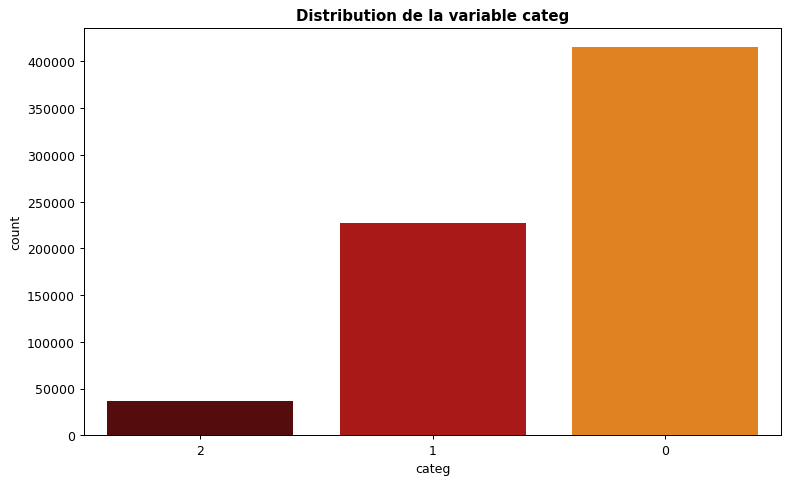

In [51]:
graph(df,"categ")

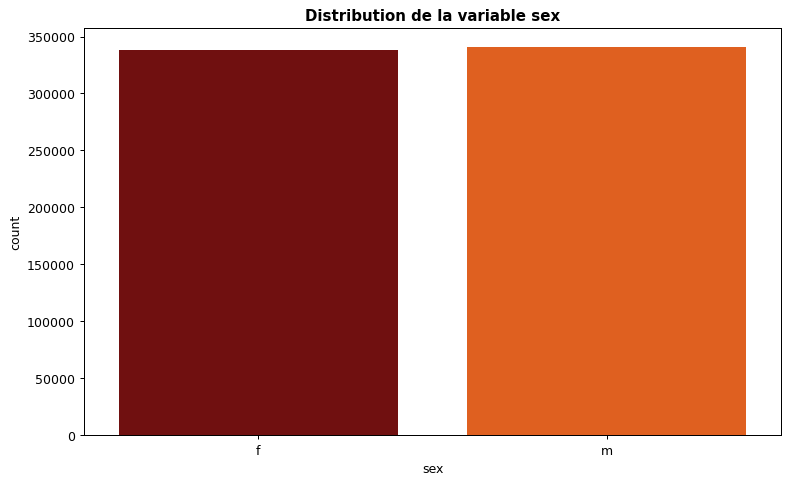

In [52]:
graph(df,"sex")

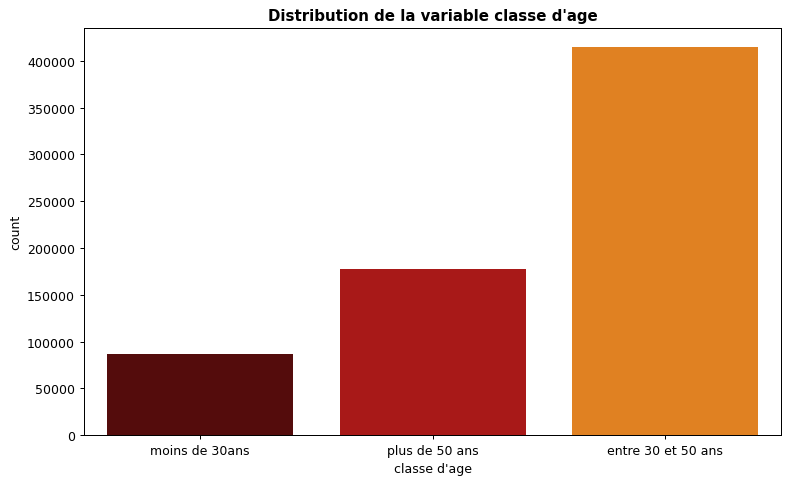

In [53]:
graph(df,"classe d'age")

### 2.3 Détection des outliers

In [54]:
#Définir une fonction pour identifier les outliers
def outliers(data,variable):
    q1,q3 = np.percentile(data[variable],[25,75])
    IQR = q3 - q1
    lower = q1 - 1.5*IQR
    hupper = q3 + 1.5*IQR
    return(data[(data[variable]<lower) | (data[variable]>hupper)])

In [55]:
price_outliers = outliers(df,"price")
price_outliers.shape[0]

42606

On observe 42606 de produits dont leurs prix dépassent la valeur maximale estimée

In [56]:
age_outliers = outliers(df,"age")
age_outliers.shape[0]

17056

On observe 17056 de clients dont leurs âge dépassent la valeur maximale estimée

## 3. Calcul d'indicateurs

**Chiffre d'affaires total au bout de ces trois années**

In [57]:
ca_total = df["price"].sum()
print(f"Le chiffre d'affaire total durant ces trois années est de {ca_total}€")

Le chiffre d'affaire total durant ces trois années est de 11853728.68€


In [58]:
#Définir une fonction pour représenter graphiquement le chiffre d'affaires selon la variable
def graph_ca(data,variable):
    plt.figure(figsize=(10,6),dpi=90)
    sns.barplot(data=data, x=variable,y="price",palette="gist_heat")
    plt.title(f"Chiffre d'affaire par {variable}",fontweight="bold")
    plt.xlabel(f"{variable}",fontweight="bold")
    plt.ylabel("Chiffre d'affaire",fontweight="bold")
    plt.xticks(rotation=45)
    plt.show()

**Chiffre d'affaires annuel**

In [59]:
ca_annuel = df.groupby("année")[["price"]].sum().reset_index()
ca_annuel

,année,price
0,2021,4770826.56
1,2022,6108681.81
2,2023,974220.31


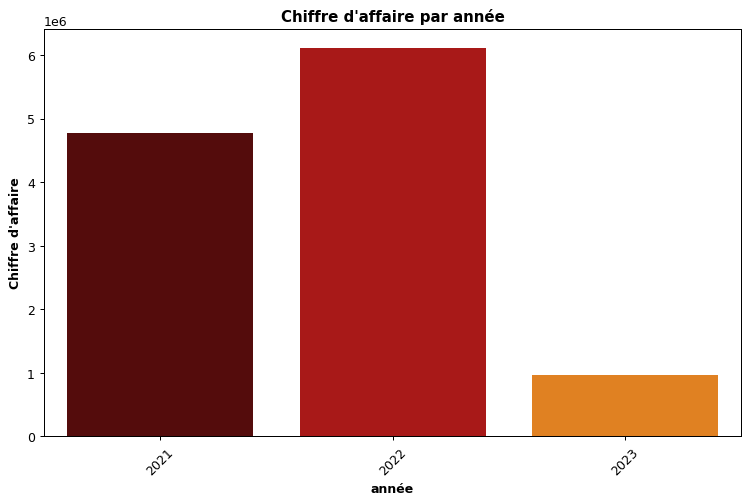

In [60]:
graph_ca(ca_annuel,"année")

**Chiffre d'affaires mensuel**

In [61]:
ca_mensuel = df.groupby("mois")[["price"]].sum().reset_index()
ca_mensuel.head()

,mois,price
0,2021-03,482440.61
1,2021-04,476109.30
2,2021-05,492943.47
3,2021-06,484088.56
4,2021-07,482835.40


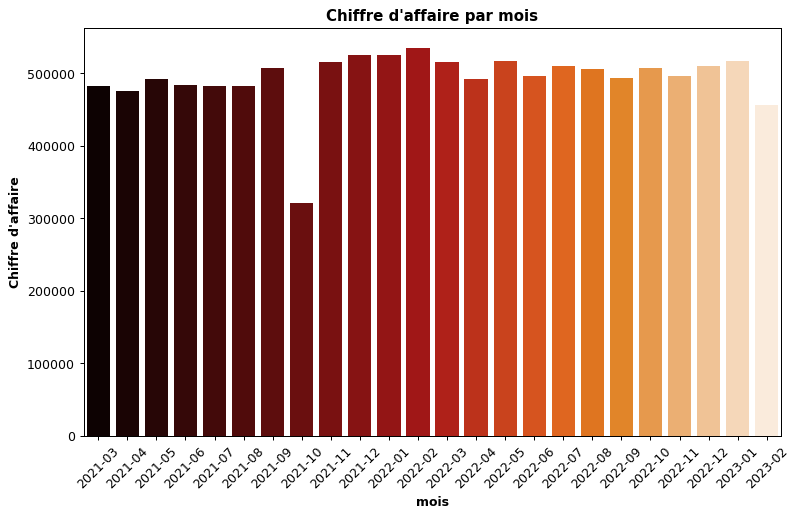

In [62]:
graph_ca(ca_mensuel,"mois")

On remarque une baisse considérable du chiffre d'affaires en octobre 2021. On va essayer de voir les causes de cette baisse 

In [63]:
#Extraire les données d'octobre 2021
df_oct21 = df.loc[(df["année"]==2021) & (df["mois"]=="2021-10")]
df_oct21 = df_oct21[["id_prod","price","categ","jour"]]
df_octjr = df_oct21.groupby(["jour","categ"])["price"].sum().reset_index()
df_octjr.head()

,jour,categ,price
0,2021-10-01,0,6950.50
1,2021-10-01,1,7003.79
2,2021-10-01,2,3104.05
3,2021-10-02,0,7141.01
4,2021-10-02,2,2041.12


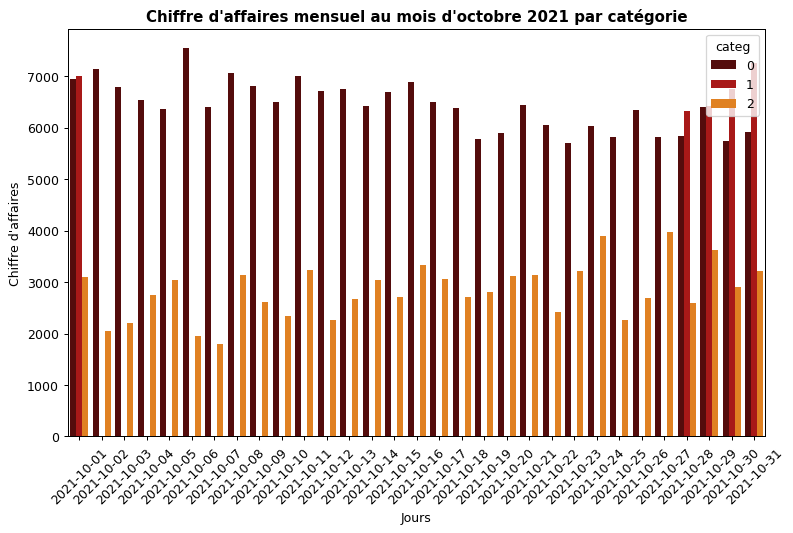

In [64]:
plt.figure(figsize=(10,6),dpi=90)
sns.barplot(data=df_octjr, x="jour",y="price",hue="categ",palette="gist_heat")
plt.title("Chiffre d'affaires mensuel au mois d'octobre 2021 par catégorie",fontweight="bold")
plt.xlabel("Jours")
plt.ylabel("Chiffre d'affaires")
plt.xticks(rotation=45)
plt.show()

On remarque que pendant plusieurs jours des livre de catégorie 1 n'ont pas été vendus durant ce mois. Peut être qu'il y'a eu rupture d'approvisionnement et ce qui explique la baisse du chiffre d'affaires au courant du mois d'octobre

**Chiffre d'affaires par catégorie de livre**

In [65]:
#Nombre de livres vendus par catégorie
df_livre_categ = df["categ"].value_counts()

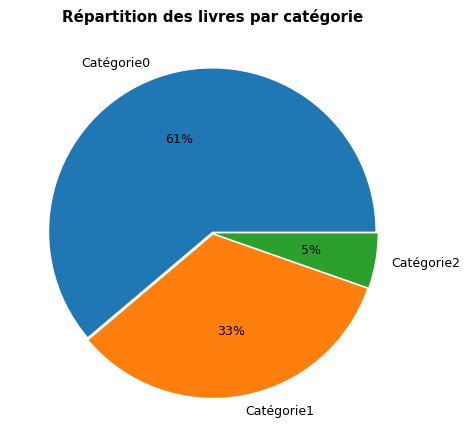

In [66]:
plt.figure(figsize=(10,6),dpi=90)
lab = ["Catégorie0","Catégorie1","Catégorie2"]
explode=(0.01,0.01,0.01)
plt.pie(df_livre_categ, labels=lab, autopct="%0.0f%%",explode=explode)
plt.title("Répartition des livres par catégorie",fontweight="bold")
plt.show()

In [67]:
#Chiffre d'affaires par catégorie de livre
ca_categ = df.groupby("categ")[["price"]].sum().reset_index()
ca_categ

,categ,price
0,0,4419730.97
1,1,4653722.69
2,2,2780275.02


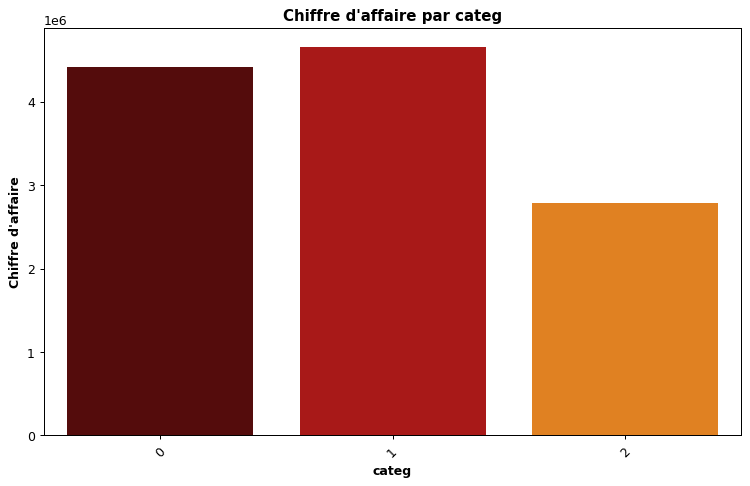

In [68]:
graph_ca(ca_categ,"categ")

On remarque que les livres de catégorie 0 ont été le plus vendu 415459 de ventes et ont généré 4.419.730,97€ de chiffre d'affaires. Ceux qui ont rapporté plus de chiffre d'affaire sont les livres de catégorie1 4.653.722,69€ et on été vendu au total 227169 fois

**Chiffre d'affaires par sexe**

In [69]:
ca_sexe = df.groupby("sex")[["price"]].sum().reset_index()
ca_sexe

,sex,price
0,f,5859683.13
1,m,5994045.55


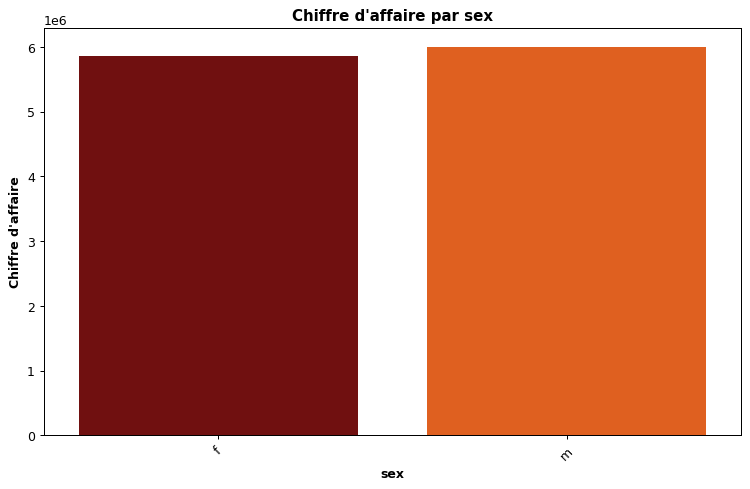

In [70]:
graph_ca(ca_sexe,"sex")

Les hommes comme les femmes génèrent presque autant de chiffre d'affaires

**Inégalité des revenus**

In [71]:
#Chiffre d'affaires des clients homme et femme
ca_client_m = df.query('sex == "m"').groupby('client_id')[['price']].sum().reset_index()
ca_client_f = df.query('sex == "f"').groupby('client_id')[['price']].sum().reset_index()

In [72]:
#Fonction pour la courbe de Lorenz
def lorenz(X,titre):
    Yl = np.cumsum(np.sort(X))/X.sum()*100
    Yl = np.append([0],Yl)
    Xl = np.arange(Yl.size)/(Yl.size-1)*100
    plt.figure(figsize=(10,8),dpi=90)
    sns.lineplot([0,100], [0,100], color = "b")
    sns.lineplot(Xl,Yl, color= "r",drawstyle='steps-post')
    plt.legend(["distribution égalitaire", "répartition des dépenses"])
    plt.title(titre,fontweight="bold")
    plt.xlabel("Pourcentage cumulé des effectifs",fontweight="bold")
    plt.ylabel("Pourcentage cumulé des caractères",fontweight="bold")
    plt.show()
    
#Fonction pour le coefficient de Gini
def gini(X):
    n = len(X)
    Xg = np.cumsum(np.sort(X))/X.sum()
    AUC = (Xg.sum() - Xg[-1]/2 - Xg[0]/2)/n
    S = 0.5 - AUC
    gini = 2*S
    print("Le coefficient de gini est", gini)

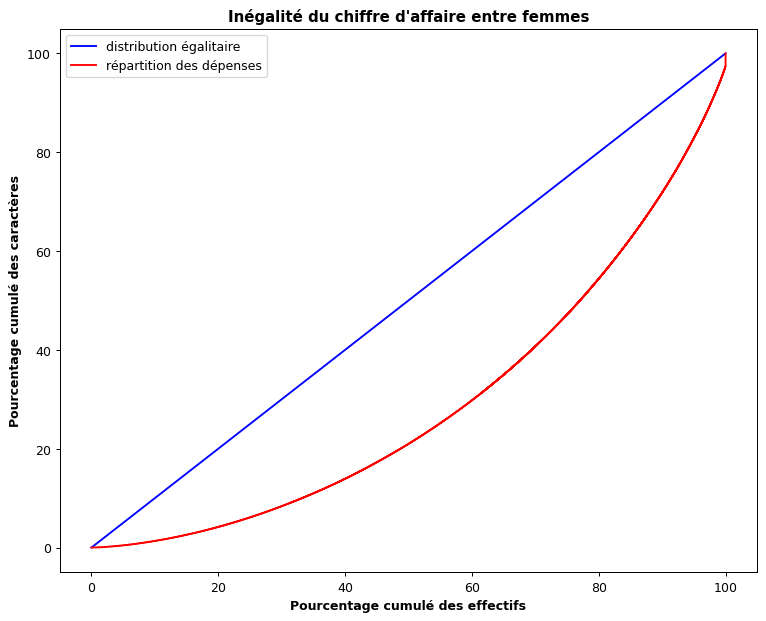

In [73]:
lorenz(ca_client_f["price"],"Inégalité du chiffre d'affaire entre femmes")

In [74]:
gini(ca_client_f["price"])

Le coefficient de gini est 0.4170815143755633


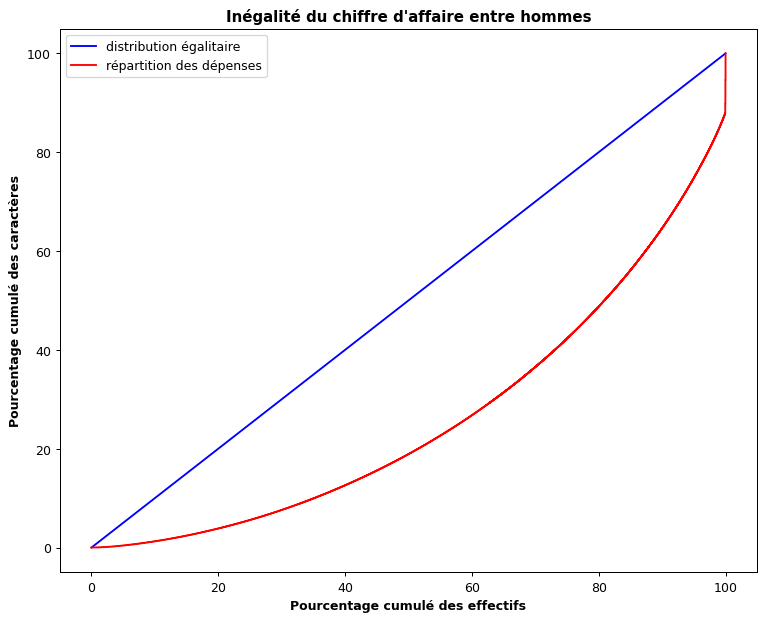

In [75]:
lorenz(ca_client_m["price"],"Inégalité du chiffre d'affaire entre hommes")

In [76]:
gini(ca_client_m["price"])

Le coefficient de gini est 0.4749827502335201


**Chiffre d'affaires entre jours ouvrables et weekend**

In [77]:
ca_week = df.groupby("weekend")[["price"]].sum().reset_index()
ca_week

,weekend,price
0,jr_ouvrable,8489112.55
1,weekend,3364616.13


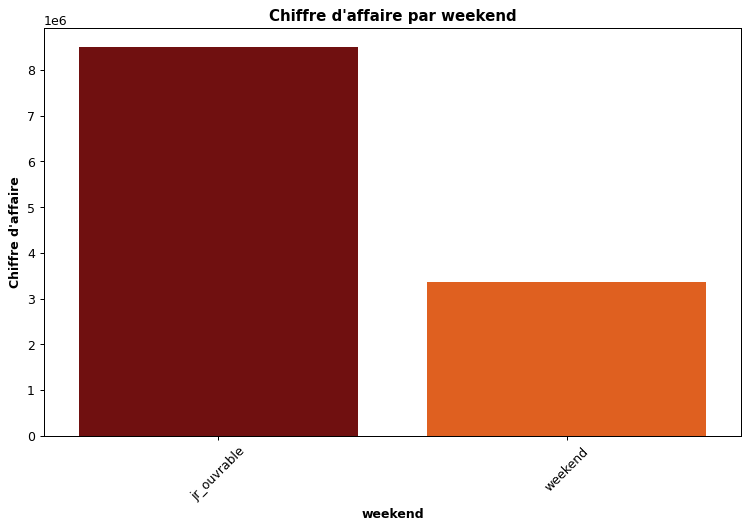

In [78]:
graph_ca(ca_week,"weekend")

In [79]:
coef_multiplicateur = round(ca_week.iloc[0,1]/ ca_week.iloc[1,1],2)
coef_multiplicateur

2.52

Le chiffre d'affaires généré sur les jours ouvrables est 2.52 fois supérieur au chiffre d'affaires généré durant le weekend

**Chiffre d'affaires par classe d'age** 

In [80]:
ca_classe_age = df.groupby("classe d'age")[["price"]].sum().reset_index()
ca_classe_age

,classe d'age,price
0,moins de 30ans,3368133.81
1,entre 30 et 50 ans,5508352.41
2,plus de 50 ans,2977242.46


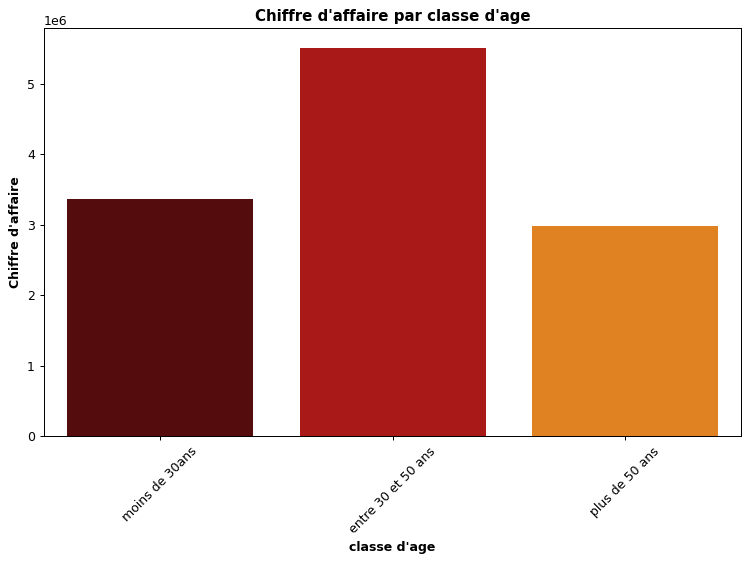

In [81]:
graph_ca(ca_classe_age,"classe d'age")

Les clients agés entre 30 et 50 ans génèrent plus de chiffre d'affaires viennent ensuite ceux agés de moins de 30 ans

**Chiffre d'affaires par clients**

In [82]:
ca_client = df.groupby("client_id")[["price"]].sum().reset_index()
ca_client.nlargest(10,"price")

,client_id,price
677,c_1609,324033.35
4388,c_4958,289760.34
6337,c_6714,153598.92
2724,c_3454,113637.93
2513,c_3263,5276.87
634,c_1570,5271.62
2108,c_2899,5214.05
1268,c_2140,5208.82
7006,c_7319,5155.77
7715,c_7959,5085.45


On remarque quatre clients qui se démarquent carrément des autres en termes de chiffre d'affaires,certainement ce sont des clients professionnels. Appelons les clients B2B (Business to Business) et les autres B2C (Business to Costumers). 

In [83]:
#Dataframe des clients B2B
clients_pro = ["c_1609","c_4958","c_6714","c_3454"]
B2B = df[df["client_id"].isin(clients_pro)]
#Nombre de transactions effectués par les clients B2B
B2B.shape[0]
#Le chiffre d'affaires généré par ces clients particuliers
B2B_ca = B2B["price"].sum()
print("le nombre de transactions réalisés par ces derniers est de",B2B.shape[0])
print("le chiffre d'affaires généré par ces clients est de",B2B_ca,"€")

le nombre de transactions réalisés par ces derniers est de 46634
le chiffre d'affaires généré par ces clients est de 881030.54 €


In [84]:
#Dataframe des clients B2C
B2C = df[~df["client_id"].isin(clients_pro)]

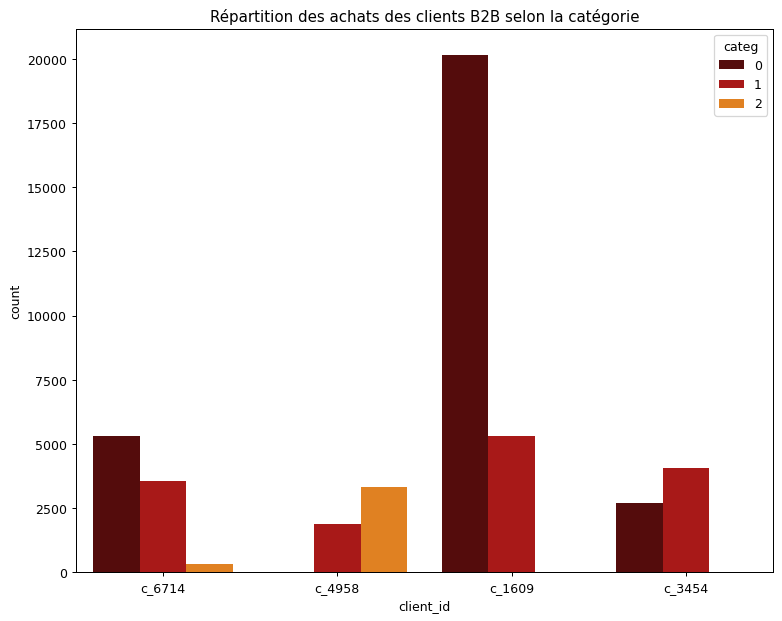

In [85]:
plt.figure(figsize=(10,8),dpi=90)
sns.countplot(data=B2B, x="client_id",hue="categ",palette="gist_heat")
plt.title("Répartition des achats des clients B2B selon la catégorie")
plt.show()

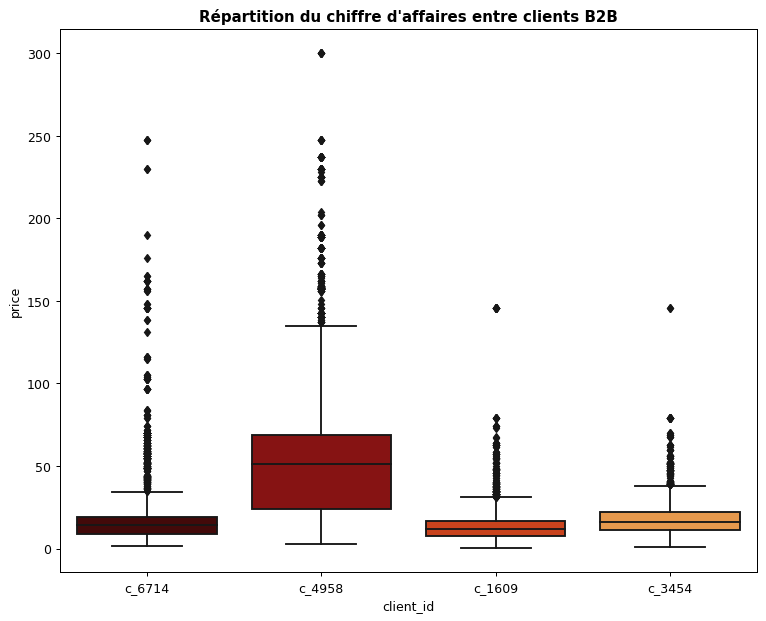

In [86]:
plt.figure(figsize=(10,8),dpi=90)
sns.boxplot(data=B2B,x="client_id",y="price",palette="gist_heat")
plt.title("Répartition du chiffre d'affaires entre clients B2B",fontweight='bold')
plt.show()

In [87]:
B2B.groupby("client_id")["price"].mean()

client_id
c_1609    12.713173
c_3454    16.785514
c_4958    55.776774
c_6714    16.730086
Name: price, dtype: float64

Le client c_4958 a généré plus de chiffre d'affaires 56€ en moyenne

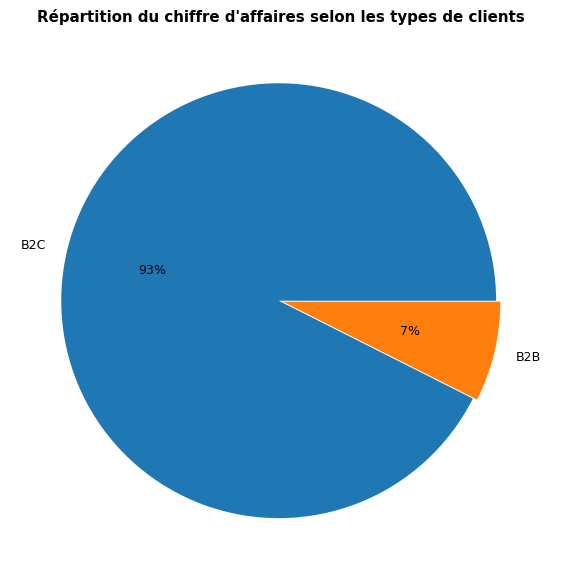

In [88]:
#Répartition du chiffre d'affaires entre les clients B2C et les clients B2B
plt.figure(figsize=(10,8),dpi=90)
lab = ["B2C","B2B"]
explode=(0.01,0.01)
plt.pie((ca_total-B2B_ca,B2B_ca),labels=lab,autopct="%0.0f%%",explode=explode)
plt.title("Répartition du chiffre d'affaires selon les types de clients",fontweight="bold")
plt.show()

Ces quatre clients B2B ont effectué 46634 de transactions et généré 881030.54€ de chiffre d'affaires ce qui représentent 7% du chiffre d'affaires totale

**Panier moyen selon l'age des clients**

In [89]:
#Calcul du panier moyen selon l'age des clients
df_age_panier=df.groupby("age").agg({"price":["sum"], "client_id": ["count"]}).reset_index()
df_age_panier["panier_moyen"]=df_age_panier.iloc[:,1]/df_age_panier.iloc[:,2]
df_panier_moyen=df_age_panier[["age","panier_moyen"]]
df_panier_moyen.head()

,age,panier_moyen
,,
0,17,40.651361
1,18,39.912041
2,19,41.031823
3,20,39.978619
4,21,39.974855


## 4. Analyse bivariée

**Entre le sexe et la catégorie des livres**

In [90]:
#Fonction mettant en relation les deux variables qualitatives
def graph_cross(data,variable):
    plt.figure(figsize=(10,6),dpi=90)
    sns.countplot(data=data, x=variable, hue="categ",palette="gist_heat")
    plt.title(f"Distribution de la variable {variable} selon la catégorie du livre",fontweight="bold")
    plt.show()

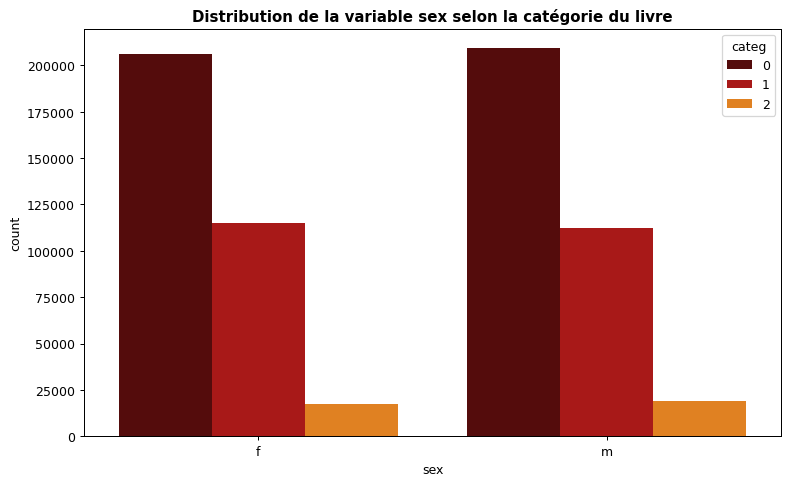

In [91]:
#Table de contingence
contingence_sex_categ = pd.crosstab(df["categ"],df["sex"])
#Relation graphique entre le sexe et la catégorie des livres
graph_cross(df,"sex")

**Entre la classe d'age et la catégorie des livres**

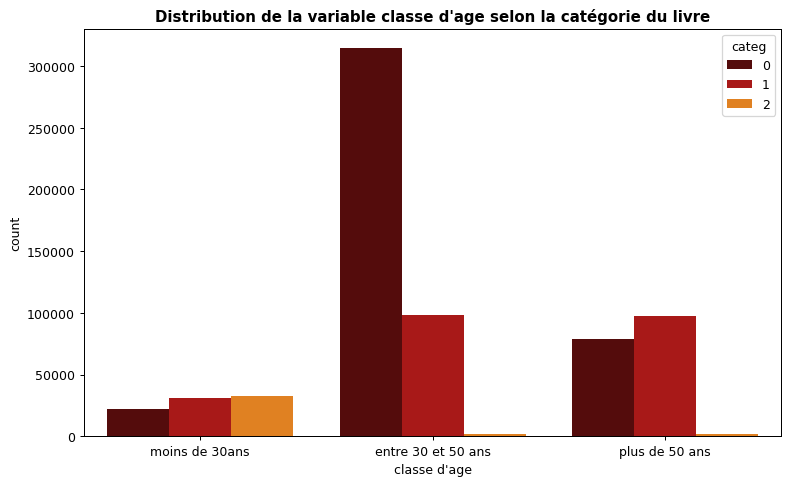

In [92]:
#Table de contingence 
contingence_classeage_categ = pd.crosstab(df["categ"],df["classe d'age"])
#Relation graphique entre la classe d'age et la catégorie des livres
graph_cross(df,"classe d'age")

**Entre l'age et le chiffre d'affaires**

In [93]:
def graph_corr(data,variable):
    plt.figure(figsize=(10,6),dpi=90)
    sns.scatterplot(data=data, x="age", y=variable)
    plt.title(f"Relation entre l'age et la variable {variable} ",fontweight="bold")
    plt.show()

**Entre l'age et le prix**

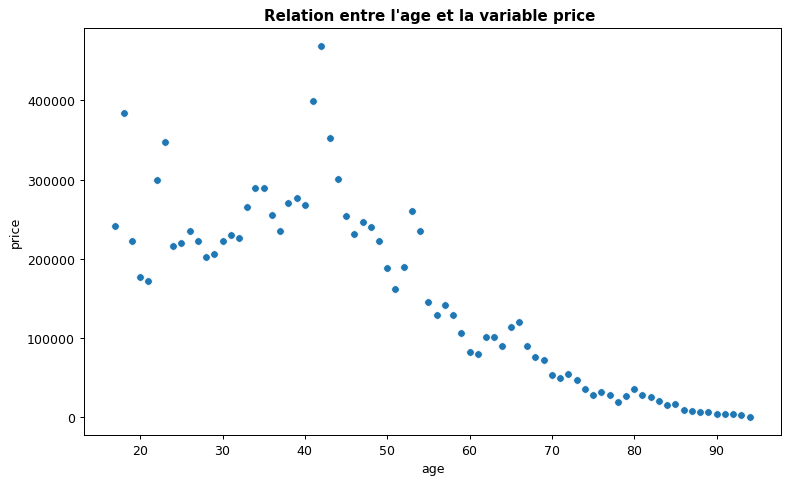

In [94]:
df_age_prix=df.groupby("age")["price"].sum().reset_index()
graph_corr(df_age_prix,"price")

**Entre l'age et le panier moyen**

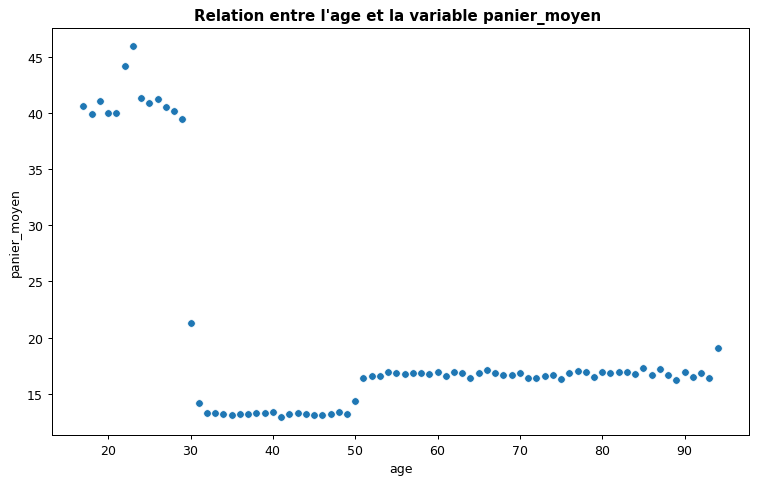

In [95]:
graph_corr(df_panier_moyen,"panier_moyen")

**Entre le prix et la catégorie des livres**

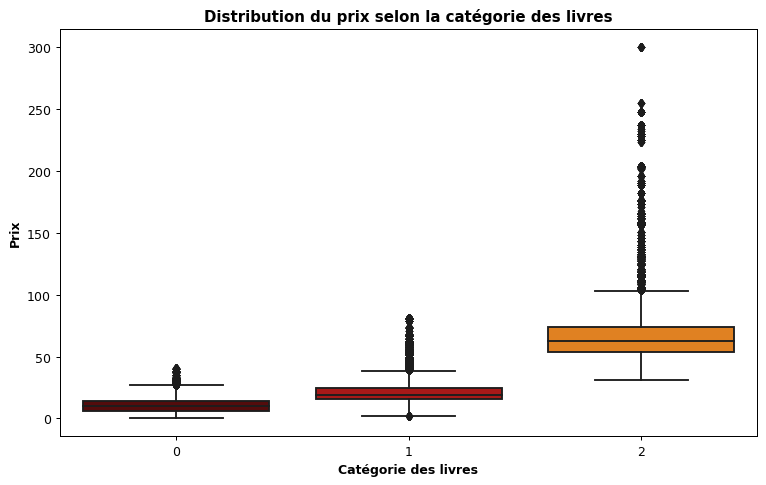

In [96]:
plt.figure(figsize=(10,6),dpi=90)
sns.boxplot(data=df,x="categ",y="price", palette="gist_heat")
plt.title("Distribution du prix selon la catégorie des livres",fontweight="bold")
plt.xlabel("Catégorie des livres",fontweight="bold")
plt.ylabel("Prix",fontweight="bold")
plt.show()

In [97]:
df.groupby("categ")["price"].mean()

categ
0    10.638188
1    20.485730
2    76.207412
Name: price, dtype: float64

**Entre l'age et la catégorie des livres**

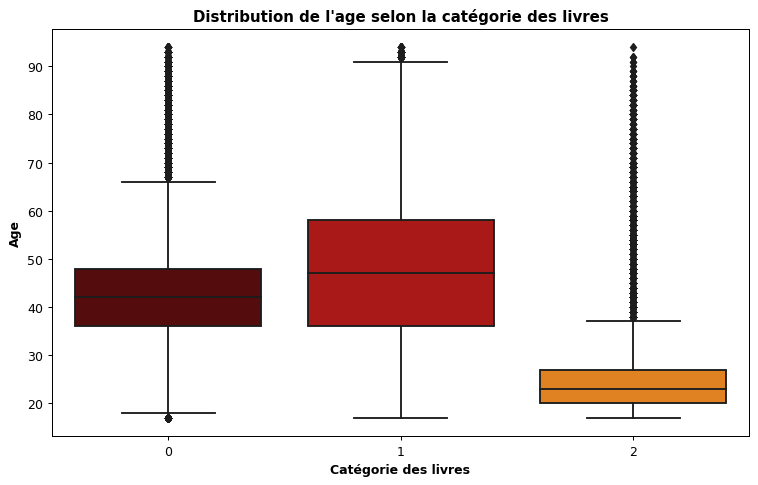

In [98]:
plt.figure(figsize=(10,6),dpi=90)
sns.boxplot(data=df,x="categ",y="age", palette="gist_heat")
plt.title("Distribution de l'age selon la catégorie des livres",fontweight="bold")
plt.xlabel("Catégorie des livres",fontweight="bold")
plt.ylabel("Age",fontweight="bold")
plt.show()

In [99]:
df.groupby("categ")["age"].mean()

categ
0    43.549250
1    47.353332
2    25.634761
Name: age, dtype: float64

## 5. Tests statistiques

**Entre variables quantitatives**

In [100]:
from scipy.stats import pearsonr

r,p = pearsonr(df["age"],df["price"])

print("La p_values est de",p)
if p <0.05:
    print("On rejette l'hypothèse nulle, il y a une corrélation entre l'age et le prix ")
else:
    print("On accepte l'hypothèse nulle, il n'y a pas de corrélations entres l'age et le prix")

La p_values est de 0.0
On rejette l'hypothèse nulle, il y a une corrélation entre l'age et le prix 


In [101]:
from scipy.stats import pearsonr

r,p = pearsonr(df_panier_moyen["age"],df_panier_moyen["panier_moyen"])

print("La p_values est de",p)
if p <0.05:
    print("On rejette l'hypothèse nulle, il y a une corrélation entre l'age et le panier moyen ")
else:
    print("On accepte l'hypothèse nulle, il n'y a pas de corrélations entres l'age et le panier moyen")

La p_values est de 1.6318950954767124e-07
On rejette l'hypothèse nulle, il y a une corrélation entre l'age et le panier moyen 


**Entre variables qualitatives**

In [102]:
from scipy.stats import chi2_contingency

khi2_obs,p,ddl,effectifs_théorique = chi2_contingency(contingence_sex_categ)


print("La p_values est de",p)
if p <0.05:
    print("On rejette l'hypothèse nulle, il y a un lien entre le sexe la catégorie des livres")
else:
    print("On accepte l'hypothèse nulle, il n'y a pas de lien entres le sexe et la catégorie des livres")

La p_values est de 1.13109805970906e-32
On rejette l'hypothèse nulle, il y a un lien entre le sexe la catégorie des livres


In [103]:
def intensité(data,variable1,variable2):
    l = len(df[variable1].unique())
    c = len(df[variable2].unique())
    N = data.shape[0]
    mini = min(l-1,c-1)
    V = np.sqrt(khi2_obs/N*mini)
    T=np.sqrt(khi2_obs/N*(l-1)*(c-1))
    print(f"Le V de Cramer est de {V}")
    print(f"Le T de Tschuprow est de {T}")

In [104]:
intensité(df,"sex","categ")

Le V de Cramer est de 0.01471851857198826
Le T de Tschuprow est de 0.020815128582546076


In [105]:
from scipy.stats import chi2_contingency

khi2_obs,p,ddl,effectifs_théorique = chi2_contingency(contingence_classeage_categ)


print("La p_values est de",p)
if p <0.05:
    print("On rejette l'hypothèse nulle, il y a un lien entre la classe d'age la catégorie des livres")
else:
    print("On accepte l'hypothèse nulle, il n'y a pas de lien entres la classe d'age et la catégorie des livres")

La p_values est de 0.0
On rejette l'hypothèse nulle, il y a un lien entre la classe d'age la catégorie des livres


In [106]:
intensité(df,"classe d'age","categ")

Le V de Cramer est de 0.9001353814994827
Le T de Tschuprow est de 1.2729836644884485


**Entre variable qualitative et variable quantitative**

**Entre le prix et la catégrie des livres**

In [107]:
groupe = df["categ"].unique()
df_anova = {categorie:df["price"][df["categ"]==categorie] for categorie in groupe}

In [108]:
from scipy.stats import f_oneway

f,p = f_oneway(df_anova[0],df_anova[1],df_anova[2])

print("La p_values est de",p)
if p <0.05:
    print("On rejette l'hypothèse nulle, le prix moyen diffère pour au moins une catégorie de livres")
else:
    print("On accepte l'hypothèse nulle, il n'y a pas de différence de prix moyen entre les catégories de livres")

La p_values est de 0.0
On rejette l'hypothèse nulle, le prix moyen diffère pour au moins une catégorie de livres


**Vérification des hypothèses pour valider le test**

Il faudra vérifier la **normalité** de la variable quantitative et **l'égalité** de la variance entre les groupes avant de valider le test d'**ANOVA**

In [109]:
from scipy.stats import shapiro

stat,p = shapiro(df["price"])

print("La p_values est de",p)
if p <0.05:
    print("On rejette l'hypothèse nulle, la variable ne suit pas une distribution normale")
else:
    print("On accepte l'hypothèse nulle, la variable suit une distribution normale")

La p_values est de 0.0
On rejette l'hypothèse nulle, la variable ne suit pas une distribution normale


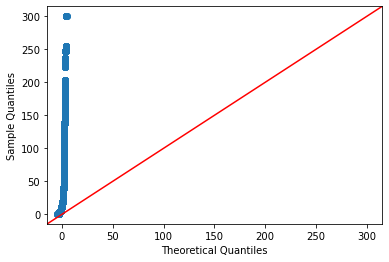

In [110]:
import statsmodels.api as sm

sm.qqplot(df["price"], line='45')
plt.show()

In [111]:
from scipy.stats import levene

f,p = levene(df_anova[0],df_anova[1],df_anova[2])

print("La p_values est de",p)
if p <0.05:
    print("On rejette l'hypothèse nulle, il n y'a pas une homogénéité des variances entre les catégories de livres")
else:
    print("On accepte l'hypothèse nulle, il y a une homogénéité des variances entre les catégories de livres")

La p_values est de 0.0
On rejette l'hypothèse nulle, il n y'a pas une homogénéité des variances entre les catégories de livres


**Conclusiosn :** La normalité et l'égalité des varaiances ne sont pas vérifées donc on ne peut pas valider le test de ANOVA. Par conséquent un va utiliser un test non paramétrique

In [112]:
from scipy.stats import kruskal

f,p = kruskal(df_anova[0],df_anova[1],df_anova[2])

print("La p_values est de",p)
if p <0.05:
    print("On rejette l'hypothèse nulle, le prix médian diffère pour au moins une catégorie de livres")
else:
    print("On accepte l'hypothèse nulle, il n'y a pas de différence de prix médian entre les catégories de livres")

La p_values est de 0.0
On rejette l'hypothèse nulle, le prix médian diffère pour au moins une catégorie de livres


**Entre l'age et la catégrie des livres**

In [113]:
df_anova2 = {categorie:df["age"][df["categ"]==categorie] for categorie in groupe}

In [114]:
from scipy.stats import f_oneway

f,p = f_oneway(df_anova2[0],df_anova2[1],df_anova2[2])

print("La p_values est de",p)
if p <0.05:
    print("On rejette l'hypothèse nulle, l'âge moyen diffère pour au moins une catégorie de livres")
else:
    print("On accepte l'hypothèse nulle, il n'y a pas de différence d'âge moyen entre les catégories de livres")

La p_values est de 0.0
On rejette l'hypothèse nulle, l'âge moyen diffère pour au moins une catégorie de livres


**Vérification des hypothèses pour valider le test**

Il faudra vérifier la **normalité** de la variable quantitative et **l'égalité** de la variance entre les groupes avant de valider le test d'**ANOVA**

In [115]:
from scipy.stats import shapiro

stat,p = shapiro(df["age"])

print("La p_values est de",p)
if p <0.05:
    print("On rejette l'hypothèse nulle, la variable ne suit pas une distribution normale")
else:
    print("On accepte l'hypothèse nulle, la variable suit une distribution normale")

La p_values est de 0.0
On rejette l'hypothèse nulle, la variable ne suit pas une distribution normale


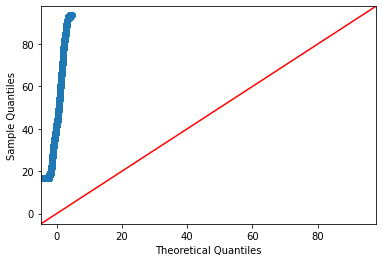

In [116]:
import statsmodels.api as sm

sm.qqplot(df["age"], line='45')
plt.show()

In [117]:
from scipy.stats import levene

f,p = levene(df_anova2[0],df_anova2[1],df_anova2[2])

print("La p_values est de",p)
if p <0.05:
    print("On rejette l'hypothèse nulle, il n'y a pas d'homogénéité des variances entre les catégories de livres")
else:
    print("On accepte l'hypothèse nulle, il y'a homogénéité des variances entre les catégories de livres")

La p_values est de 0.0
On rejette l'hypothèse nulle, il n'y a pas d'homogénéité des variances entre les catégories de livres


**Conclusiosn :** La normalité et l'égalité des varaiances ne sont pas vérifées donc on ne peut pas valider le test de ANOVA. Par conséquent un va utiliser un test non paramétrique

In [118]:
from scipy.stats import kruskal

f,p = kruskal(df_anova2[0],df_anova2[1],df_anova2[2])

print("La p_values est de",p)
if p <0.05:
    print("On rejette l'hypothèse nulle, l'âge médian diffère pour au moins une catégorie de livres")
else:
    print("On accepte l'hypothèse nulle, il n'y a pas de différence d'âge médian entre les catégories de livres")

La p_values est de 0.0
On rejette l'hypothèse nulle, l'âge médian diffère pour au moins une catégorie de livres
